# Análisis de datos con python
### Esteban David Pinto Gonzalez
<img src="Logo_uninorte.jpg" alt="Imagen" width="900" height="150">

---
# Natalidad por departamentos

Nuestra base de datos a utilizar para el analisis y posterior graficacion sera *Pinto.dta* la cual contiene información sobre los nacimientos por departamentos segun el sexo y el nivel territorial, ya sea departamental o cabeza municipal. Asimismo se hace la apreciacion que estos datos se obtenieron del Dane para la realizacion del ejercicio.

Como todo análisis de datos empezaremos por realizar el análisis exploratorio de los datos para conocer su *naturaleza*, *estructura* y *que tipo de información estamos trabajando*.  

---
## Paso 1: Analisis exploratorio
### Análisis exploratorio
```Python
#Cargar nuestra base de datos en el entorno de trabajo.
import pandas as pd
df= pd.read_stata("Pinto.dta")
df.head()
df.tail()
df.info()
```
---
## Paso 2: Tratamiento básico
```Python
# Renombrar columnas
df=df.rename(columns={'B':'Total', 'D':'Hombres', 'E':'Mujeres', 'F':'Indeterminado','C':'Nivel_territorial','A':'Departamento'})

# Eliminar todos los valores nulos del dataframe
df.dropna(inplace=True)

#Con la opción estandar no funciona. ¿Por Qué?
df=df.replace('nan', None)
df = df.dropna()
```
---
## Paso 3: Convertir a tipo de numeros
```Python
df['Total']=df['Total'].astype(int)
df['Hombres']=df['Hombres'].astype(int)
df['Mujeres']=df['Mujeres'].astype(int)
df['Indeterminado']=df['Indeterminado'].astype(int)
```
---
## Paso 4: Eliminar filar hasta cierto punto
```Python
df = df.iloc[:70]
df.drop(['index'], axis=1)
```
---
## Paso 5: Eliminar columna index y filas
```Python
df.drop(['index'], axis=1,inplace=True)
#Se eliminan filas con datos de extranjeros, sin informacion y totales
df= df.drop([0,34,35,36])         
df['Nivel_territorial'] = df['Nivel_territorial'].replace('Pais', 'Departamental')
```
---
## Paso 6: Cambiar valores de filas
```Python
df['Departamento'] = df['Departamento'].replace('05', 'Antioquia')
df['Departamento'] = df['Departamento'].replace('08', 'Atlantico')
df['Departamento'] = df['Departamento'].replace('11', 'Bogota')
df['Departamento'] = df['Departamento'].replace('13', 'Bolivar')
df['Departamento'] = df['Departamento'].replace('15', 'Boyaca')
df['Departamento'] = df['Departamento'].replace('17', 'Caldas')
df['Departamento'] = df['Departamento'].replace('18', 'Caqueta')
df['Departamento'] = df['Departamento'].replace('19', 'Cauca')
df['Departamento'] = df['Departamento'].replace('20', 'Cesar')
df['Departamento'] = df['Departamento'].replace('23', 'Cordoba')
df['Departamento'] = df['Departamento'].replace('25', 'Cundinamarca')
df['Departamento'] = df['Departamento'].replace('27', 'Choco')
df['Departamento'] = df['Departamento'].replace('41', 'Huila')
df['Departamento'] = df['Departamento'].replace('44', 'La Guajira')
df['Departamento'] = df['Departamento'].replace('47', 'Magdalena')
df['Departamento'] = df['Departamento'].replace('50', 'Meta')
df['Departamento'] = df['Departamento'].replace('52', 'Nariño')
df['Departamento'] = df['Departamento'].replace('54', 'Norte de Santander')
df['Departamento'] = df['Departamento'].replace('63', 'Quindio')
df['Departamento'] = df['Departamento'].replace('66', 'Risaralda')
df['Departamento'] = df['Departamento'].replace('68', 'Santander')
df['Departamento'] = df['Departamento'].replace('70', ' Sucre')
df['Departamento'] = df['Departamento'].replace('73', 'Tolima')
df['Departamento'] = df['Departamento'].replace('76', 'Valle del Cauca')
df['Departamento'] = df['Departamento'].replace('81', 'Arauca')
df['Departamento'] = df['Departamento'].replace('85', 'Casanare')
df['Departamento'] = df['Departamento'].replace('86', 'Putumayo')
df['Departamento'] = df['Departamento'].replace('88', 'San Andrés y Providencia')
df['Departamento'] = df['Departamento'].replace('91', 'Amazonas')
df['Departamento'] = df['Departamento'].replace('94', 'Guainia')
df['Departamento'] = df['Departamento'].replace('95', 'Guaviare')
df['Departamento'] = df['Departamento'].replace('97', 'Vaupes')
df['Departamento'] = df['Departamento'].replace('99', 'Vichada')
df.describe()
```
---
## Paso 7: Graficacion
```Python
import seaborn as sns
import numpy as np

# Graficos de barras
sns.set_theme(style="whitegrid")

Natalidad = df
sns.catplot(data=Natalidad, kind="bar", x="Total", y="Departamento", hue='Nivel_territorial',palette='deep', height=10, aspect=0.8)
sns.catplot(data=Natalidad, kind="bar", x="Hombres", y="Departamento", col='Nivel_territorial',palette='Paired',height=8, aspect=0.8)
sns.catplot(data=Natalidad, kind="bar", x="Mujeres", y="Departamento", col='Nivel_territorial',palette='Paired',height=8,aspect=0.8)

#suma de columnas
suma_precios = Natalidad['Hombres'].sum()
suma_precios1 = Natalidad['Mujeres'].sum()

#Grafico de pie
import matplotlib.pyplot as plt
labels = 'Hombres', 'Mujeres'
sizes = [suma_precios, suma_precios1]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['aquamarine', 'palegreen'],shadow=True, startangle=90)
plt.show()

# Grafico de barras
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

genero = ['Hombres', 'Mujeres']
counts = [suma_precios, suma_precios1]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('# Natalidad')
ax.set_title('Nacimientos segun el genero')

plt.show()

#guardar nuesta base de datos
df.to_stata("baseTrabajada.dta",write_index=False)

```
---

In [1]:
#Paso 1: Cargar nuestra base de datos en el entorno de trabajo.
import pandas as pd
df= pd.read_stata("Pinto.dta")
df.head()
df.tail()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 540000 entries, 0 to 539999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   index   540000 non-null  int32 
 1   A       540000 non-null  object
 2   B       540000 non-null  object
 3   C       540000 non-null  object
 4   D       540000 non-null  object
 5   E       540000 non-null  object
 6   F       540000 non-null  object
dtypes: int32(1), object(6)
memory usage: 30.9+ MB


In [2]:
# Paso 2: Tratamiento básico
# Recodificar las variables
df=df.rename(columns={'B':'Total', 'D':'Hombres', 'E':'Mujeres', 'F':'Indeterminado','C':'Nivel_territorial','A':'Departamento'})
df
# Eliminar todos los valores nulos del dataframe
df.dropna(inplace=True)
#Con la opción estandar no funciona. ¿Por Qué?
df=df.replace('nan', None)
df = df.dropna()

In [3]:
#Paso 3: Convertir a tipo de numeros 
df['Total']=df['Total'].astype(int)
df['Hombres']=df['Hombres'].astype(int)
df['Mujeres']=df['Mujeres'].astype(int)
df['Indeterminado']=df['Indeterminado'].astype(int)

#Paso 4: Eliminar filar hasta cierto punto
df = df.iloc[:70]
df.drop(['index'], axis=1)

#Paso 5: Eliminar columna index y filas
df.drop(['index'], axis=1,inplace=True)
#Se eliminan filas con datos de extranjeros, sin informacion y totales
df= df.drop([0,34,35,36])         
df['Nivel_territorial'] = df['Nivel_territorial'].replace('Pais', 'Departamental')


In [4]:
#Paso 6: Cambiar valores de filas
df['Departamento'] = df['Departamento'].replace('05', 'Antioquia')
df['Departamento'] = df['Departamento'].replace('08', 'Atlantico')
df['Departamento'] = df['Departamento'].replace('11', 'Bogota')
df['Departamento'] = df['Departamento'].replace('13', 'Bolivar')
df['Departamento'] = df['Departamento'].replace('15', 'Boyaca')
df['Departamento'] = df['Departamento'].replace('17', 'Caldas')
df['Departamento'] = df['Departamento'].replace('18', 'Caqueta')
df['Departamento'] = df['Departamento'].replace('19', 'Cauca')
df['Departamento'] = df['Departamento'].replace('20', 'Cesar')
df['Departamento'] = df['Departamento'].replace('23', 'Cordoba')
df['Departamento'] = df['Departamento'].replace('25', 'Cundinamarca')
df['Departamento'] = df['Departamento'].replace('27', 'Choco')
df['Departamento'] = df['Departamento'].replace('41', 'Huila')
df['Departamento'] = df['Departamento'].replace('44', 'La Guajira')
df['Departamento'] = df['Departamento'].replace('47', 'Magdalena')
df['Departamento'] = df['Departamento'].replace('50', 'Meta')
df['Departamento'] = df['Departamento'].replace('52', 'Nariño')
df['Departamento'] = df['Departamento'].replace('54', 'Norte de Santander')
df['Departamento'] = df['Departamento'].replace('63', 'Quindio')
df['Departamento'] = df['Departamento'].replace('66', 'Risaralda')
df['Departamento'] = df['Departamento'].replace('68', 'Santander')
df['Departamento'] = df['Departamento'].replace('70', ' Sucre')
df['Departamento'] = df['Departamento'].replace('73', 'Tolima')
df['Departamento'] = df['Departamento'].replace('76', 'Valle del Cauca')
df['Departamento'] = df['Departamento'].replace('81', 'Arauca')
df['Departamento'] = df['Departamento'].replace('85', 'Casanare')
df['Departamento'] = df['Departamento'].replace('86', 'Putumayo')
df['Departamento'] = df['Departamento'].replace('88', 'San Andrés y Providencia')
df['Departamento'] = df['Departamento'].replace('91', 'Amazonas')
df['Departamento'] = df['Departamento'].replace('94', 'Guainia')
df['Departamento'] = df['Departamento'].replace('95', 'Guaviare')
df['Departamento'] = df['Departamento'].replace('97', 'Vaupes')
df['Departamento'] = df['Departamento'].replace('99', 'Vichada')
df

,Departamento,Total,Nivel_territorial,Hombres,Mujeres,Indeterminado
1,Antioquia,66766,Departamental,34229,32532,5
2,Atlantico,36081,Departamental,18450,17630,1
3,Bogota,64737,Departamental,33086,31647,4
4,Bolivar,33859,Departamental,17304,16554,1
5,Boyaca,11997,Departamental,6016,5979,2
...,...,...,...,...,...,...
65,Amazonas,511,Cabecera municipal,275,236,0
66,Guainia,461,Cabecera municipal,237,224,0
67,Guaviare,678,Cabecera municipal,332,346,0
68,Vaupes,199,Cabecera municipal,99,100,0


In [5]:
df.describe()

,Total,Hombres,Mujeres,Indeterminado
count,66.000000,66.000000,66.000000,66.000000
mean,15001.515152,7671.136364,7329.409091,0.969697
std,15832.583188,8102.042709,7729.905699,1.424723
min,199.000000,99.000000,100.000000,0.000000
25%,4235.750000,2177.750000,2057.500000,0.000000
50%,9508.500000,4897.000000,4655.000000,0.000000
75%,21716.000000,11046.750000,10616.250000,1.000000
max,66766.000000,34229.000000,32532.000000,7.000000


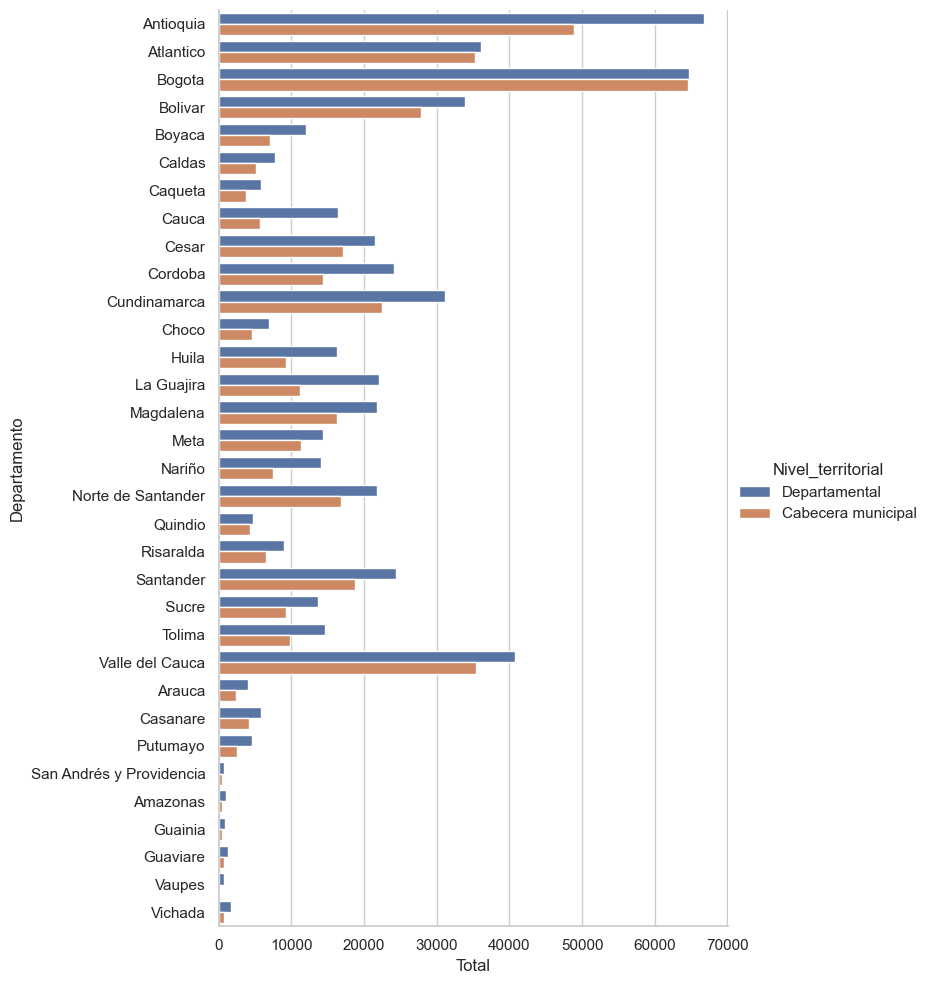

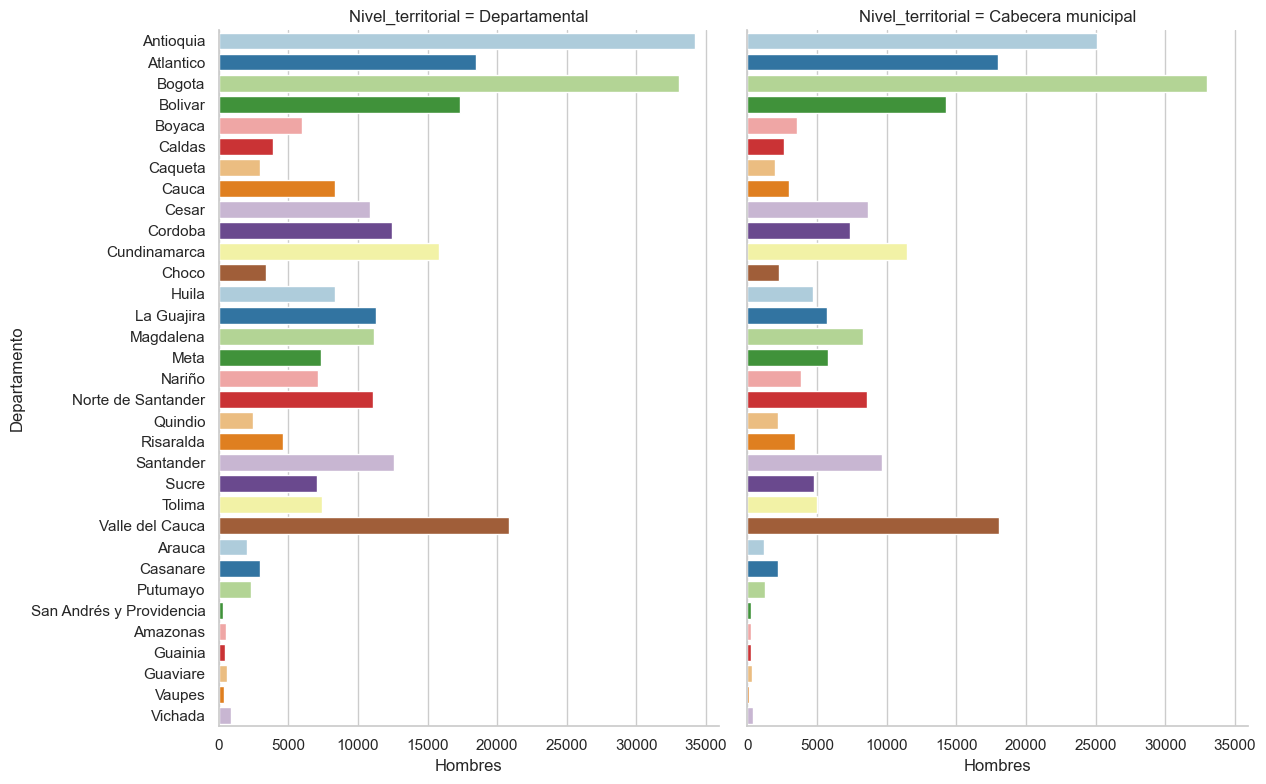

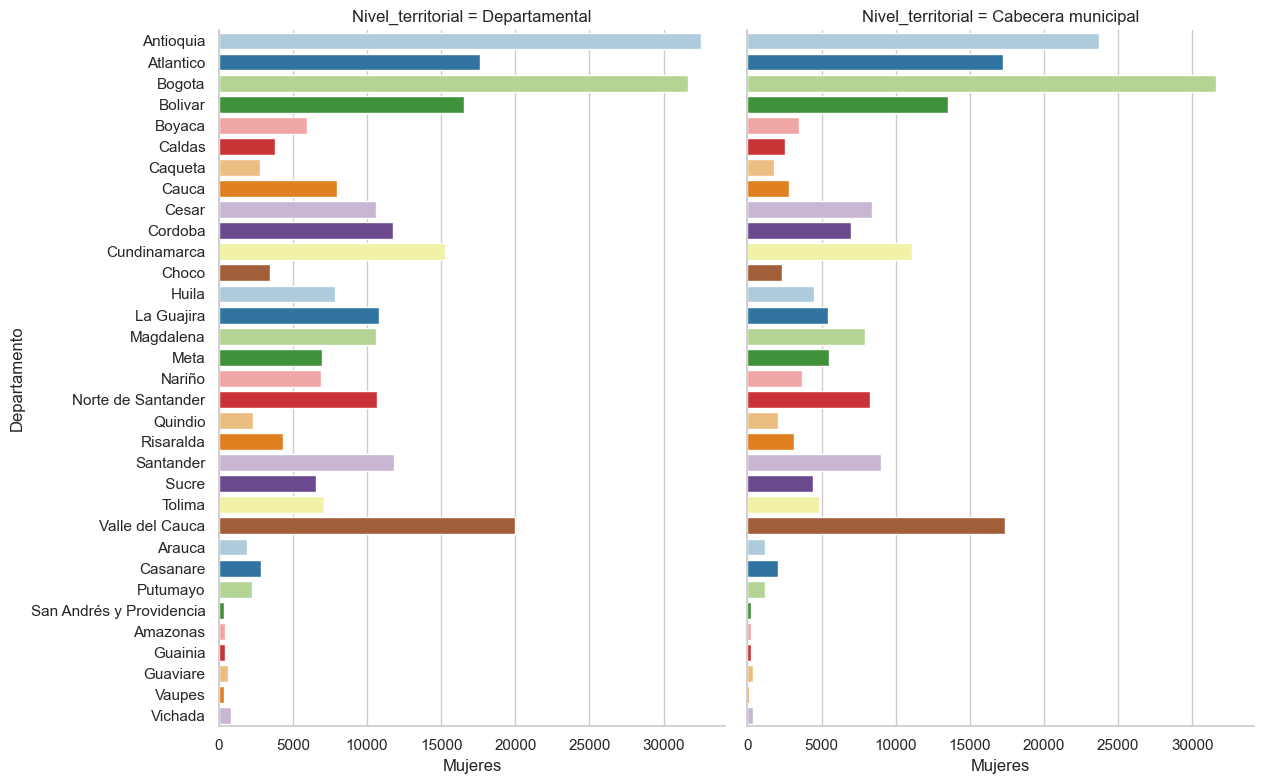

In [6]:
#Graficacion

import seaborn as sns
import numpy as np
# Load an example dataset
sns.set_theme(style="whitegrid")

Natalidad = df
sns.catplot(data=Natalidad, kind="bar", x="Total", y="Departamento", hue='Nivel_territorial',palette='deep', height=10, aspect=0.8)
sns.catplot(data=Natalidad, kind="bar", x="Hombres", y="Departamento", col='Nivel_territorial',palette='Paired',height=8, aspect=0.8)
sns.catplot(data=Natalidad, kind="bar", x="Mujeres", y="Departamento", col='Nivel_territorial',palette='Paired',height=8,aspect=0.8)


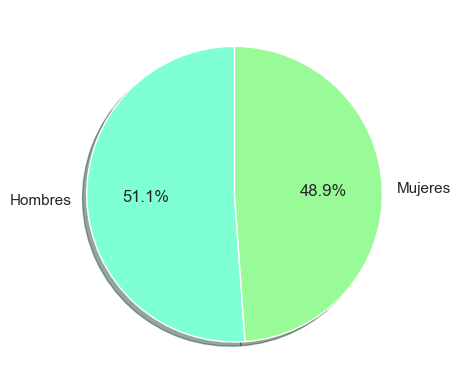

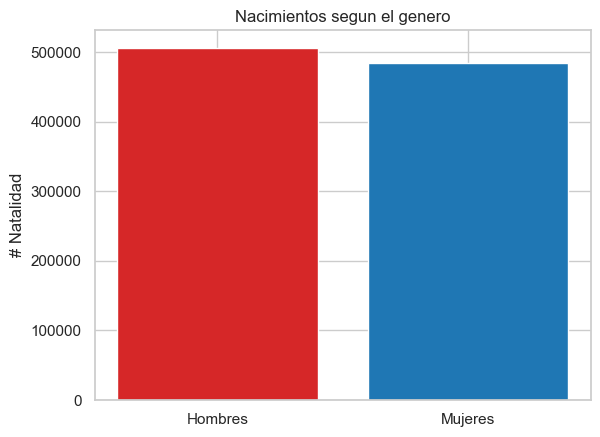

In [7]:

#suma de una columna
suma_precios = Natalidad['Hombres'].sum()
suma_precios1 = Natalidad['Mujeres'].sum()

#Grafico de pie
import matplotlib.pyplot as plt
labels = 'Hombres', 'Mujeres'
sizes = [suma_precios, suma_precios1]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['aquamarine', 'palegreen'],shadow=True, startangle=90)
plt.show()

# Grafico de barras
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

genero = ['Hombres', 'Mujeres']
counts = [suma_precios, suma_precios1]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(genero, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('# Natalidad')
ax.set_title('Nacimientos segun el genero')

plt.show()

#guardar nuesta base de datos
df.to_stata("baseTrabajada.dta",write_index=False)
